# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate

2022-06-18 17:48:01.862908: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-18 17:48:01.865760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 17:48:01.865768: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

#df = pd.read_csv(param.rssi_csv_output)
#df.head(100)

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

#print("RSSI shape :",np.shape(RSSI.rssi))
#print("RSSI :\n",RSSI.rssi)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty
print("mac size : ", np.size(RSSI.mac))
#print("mac :\n",RSSI.mac)

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

#print("Zones size :",np.size(RSSI.zones))
#print("Zones :\n",RSSI.zones)

mac size :  128


## Load data

In [3]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,RSSI.zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
train_data = train_data/(-95)
test_data = test_data/(-95)
train_labels = train_labels/6
test_labels = test_labels/6
print(train_data)

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198,)
test_data :  (67, 128)
test_labels :  (67,)
[[0.70526316 0.70526316 0.72631579 ... 1.         1.         1.        ]
 [0.68421053 0.75789474 0.83157895 ... 1.         1.         1.        ]
 [0.72631579 0.74736842 0.64210526 ... 0.87368421 0.87368421 1.        ]
 ...
 [0.69473684 0.66315789 0.83157895 ... 1.         1.         1.        ]
 [0.72631579 0.73684211 0.76842105 ... 1.         1.         1.        ]
 [0.66315789 0.69473684 0.54736842 ... 1.         1.         0.86315789]]


## Create the model

In [4]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(10)
])

2022-06-18 17:48:03.285526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-18 17:48:03.285548: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-18 17:48:03.285563: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (romain-framework): /proc/driver/nvidia/version does not exist
2022-06-18 17:48:03.285732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile the model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [6]:
# feed the model :
print(np.shape(train_data))
print(np.shape(train_labels))
history = model.fit(train_data, train_labels, epochs=200)
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

(198, 128)
(198,)
Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 5.0064 - accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 1ms/step - loss: 4.9994 - accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 4.9920 - accuracy: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 4.9853 - accuracy: 0.0000e+00
Epoch 5/200
7/7 [==============================] - 0s 1ms/step - loss: 4.9785 - accuracy: 0.0000e+00
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 4.9716 - accuracy: 0.0000e+00
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 4.9648 - accuracy: 0.0000e+00
Epoch 8/200
7/7 [==============================] - 0s 1ms/step - loss: 4.9585 - accuracy: 0.0000e+00
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 4.9522 - accuracy: 0.0000e+00
Epoch 10/200
7/7 [==============================] - 0s 1ms/step - loss: 4

7/7 [==============================] - 0s 1ms/step - loss: 1.5944 - accuracy: 0.1313
Epoch 85/200
7/7 [==============================] - 0s 1ms/step - loss: 1.5559 - accuracy: 0.1313
Epoch 86/200
7/7 [==============================] - 0s 1ms/step - loss: 1.5183 - accuracy: 0.1313
Epoch 87/200
7/7 [==============================] - 0s 2ms/step - loss: 1.4820 - accuracy: 0.1313
Epoch 88/200
7/7 [==============================] - 0s 946us/step - loss: 1.4466 - accuracy: 0.1313
Epoch 89/200
7/7 [==============================] - 0s 2ms/step - loss: 1.4117 - accuracy: 0.1313
Epoch 90/200
7/7 [==============================] - 0s 1ms/step - loss: 1.3775 - accuracy: 0.1313
Epoch 91/200
7/7 [==============================] - 0s 1ms/step - loss: 1.3445 - accuracy: 0.1313
Epoch 92/200
7/7 [==============================] - 0s 1ms/step - loss: 1.3120 - accuracy: 0.1313
Epoch 93/200
7/7 [==============================] - 0s 1ms/step - loss: 1.2803 - accuracy: 0.1313
Epoch 94/200
7/7 [=============

Epoch 167/200
7/7 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.1313
Epoch 168/200
7/7 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.1313
Epoch 169/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.1313
Epoch 170/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.1313
Epoch 171/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.1313
Epoch 172/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.1313
Epoch 173/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.1313
Epoch 174/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.1313
Epoch 175/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.1313
Epoch 176/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.1313
Epoch 177/

## Ploting learning datas

Text(0.5, 0, 'Epoch')

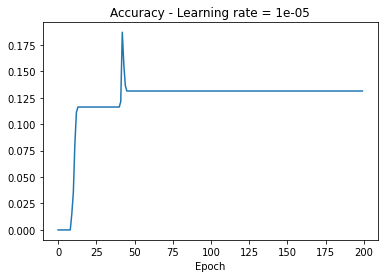

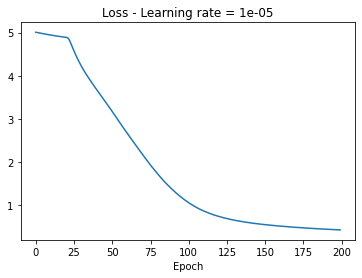

In [7]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="train_acc")
#plt.plot(val_acc,color="red", label="train_acc")
plt.title("Accuracy - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_accuracy_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

plt.figure(2)
plt.plot(loss, label="train_loss")
#plt.plot(val_loss,color="red", label="val_loss")
plt.title("Loss - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_loss_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

